# Part 1 - Chapter 0
There is no actual PyTorch code in this chapter... it is Numpy all along! Just knowing how gradient descent works.

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

**Gradient descent**: is an iterative technique commonly used in machine learning and deep learning to **find the best possible set of parameters / coefficients for a given model, data points, and loss function, starting from an initial, and usually random, guess.**

***Why visualizing gradient descent?***

A way which learn such a fundamental topic.

We must set two things:

1- **Model**, we want to train to better understand gradient descent

2- Generate synthetic **data** for that model

## Model: Linear Regression

$y=b+wx+\epsilon$

## Data Generation
For b=1, w=2.

In [4]:
true_b = 1
true_w = 2
N = 100

np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = (.1 * np.random.randn(N, 1))
y = true_b + true_w * x + epsilon

Now, splitting synthetic data into train and validation sets, shuffling the array of indices and using the first 80 shuffled points for training.

**Why shuffling?**

Always shuffle data points before training a model to improve the performance of gradient descent. *But in time-series problems, shuffling can lead to data leakage!*

### Train-Validation-Test Splitting points:

1- The split should always be the **first thing** you do-no preprocessing, no transformations: nothing happens before the split. That's why we do this **immediately** after the synthetic data generation.

2- Now, we use only training set.

In [5]:
# Shuffle the indices
idx = np.arange(N)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:int(N*.8)]

# Uses the remaining indices for validation
val_idx = idx[int(N*.8):]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

## Random Initialization

In [6]:
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

print(b, w)

[0.49671415] [-0.1382643]


## Compute Model's Predictions

In [7]:
yhat = b + w * x_train

## Loss Computation

In [8]:
error = (yhat - y_train)
loss = (error ** 2).mean()
print(loss)

2.7421577700550976


## Gradient for linear regression

![image.png]()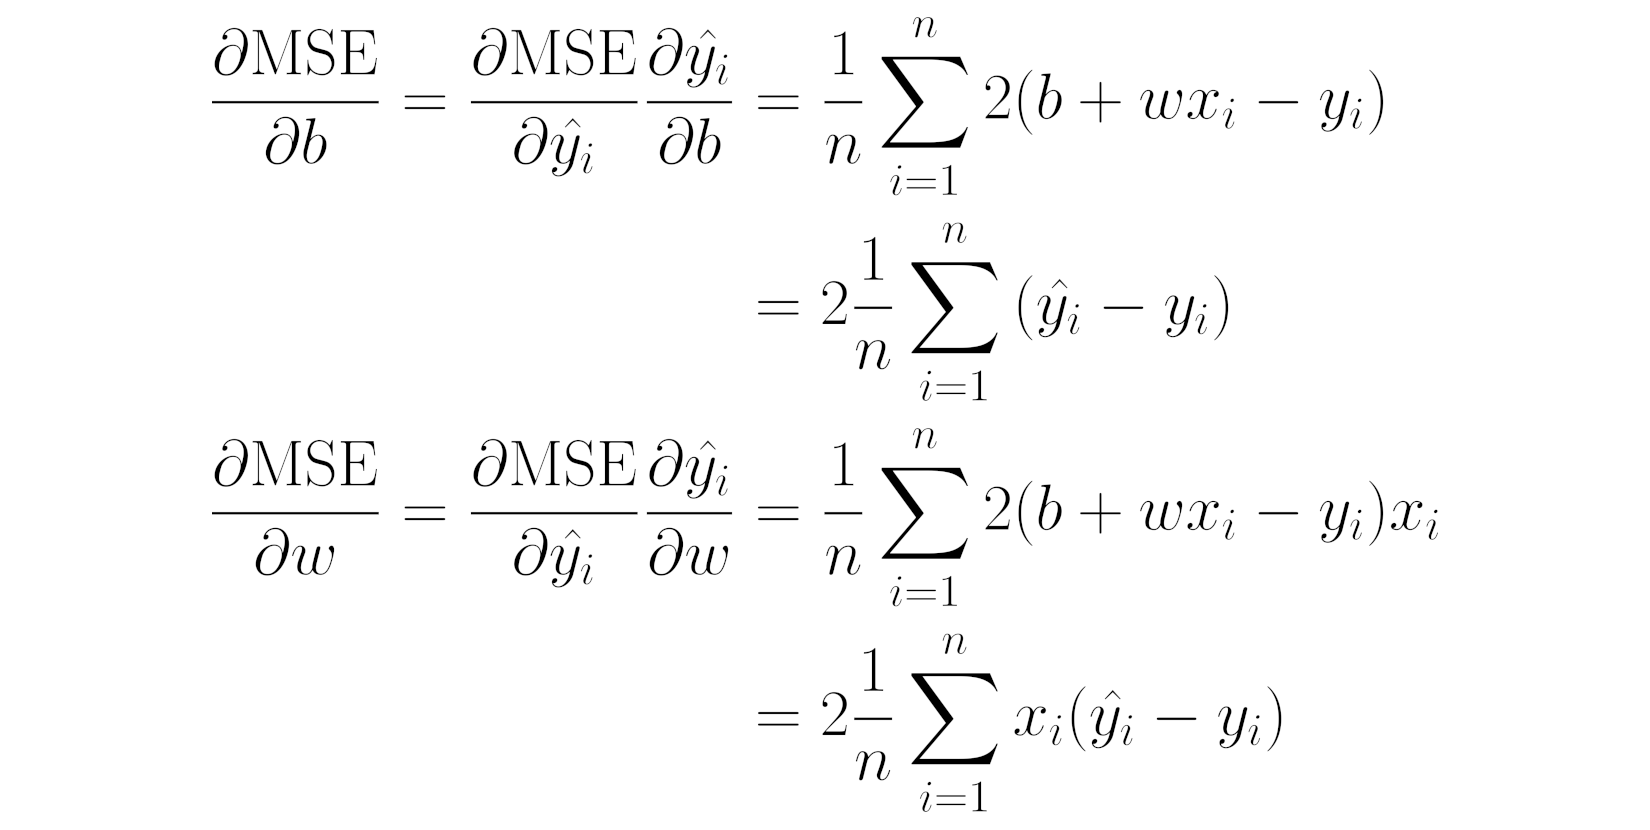

## Learning Rate
The **learning rate** is the most important hyper-parameter.

There is an image from *CS231n* class from Stanford, that shows affect of different learning rates.
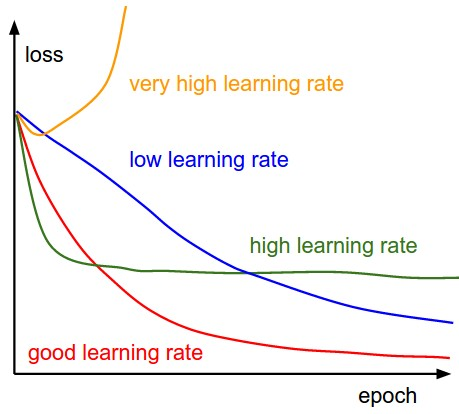

**Low learning rates** will likely get you to (some) minimum point, eventually. Unfortunately, time is money, especially when you’re paying for GPU time in the cloud, so, there is an incentive to try higher learning rates.

**Too high, for a learning rate**, is a relative concept: It depends on how steep the curve is, or, in other words, it depends on how large the gradient is.

> The size of the learning rate is limited by the steepest curve.


<div dir="rtl">
<h1>ویژگی بد</h1>
در مثال‌های قبل اینگونه بود که w و b داشتیم. حال مقدار x را در 10 ضرب می‌کنیم و مقدار w را به 10 تقسیم می‌کنیم. مقادیر جدید را به bad_x و bad_w تغییر نام می‌دهیم. عملا مقدار ضربشان یکی می‌شود.
</div>

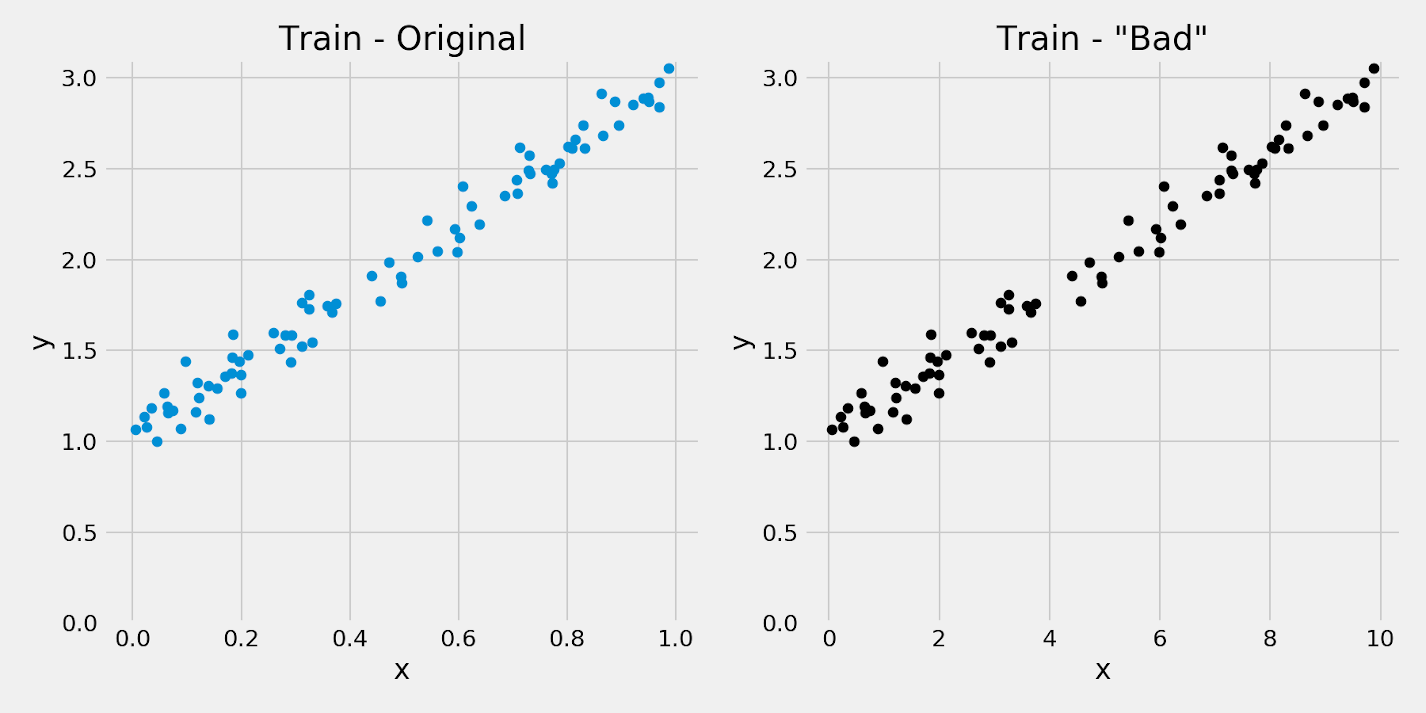

<div dir="rtl">
تنها فرق بین دو نمودار scale ویژگی x است. قبلا در بازۀ 0 و 1 بوده است. الآن در بازۀ 0 و 10 است.

صفحۀ loss را ترسیم می‌کنیم و آن‌ها را مقایسه می‌کنیم.
</div>

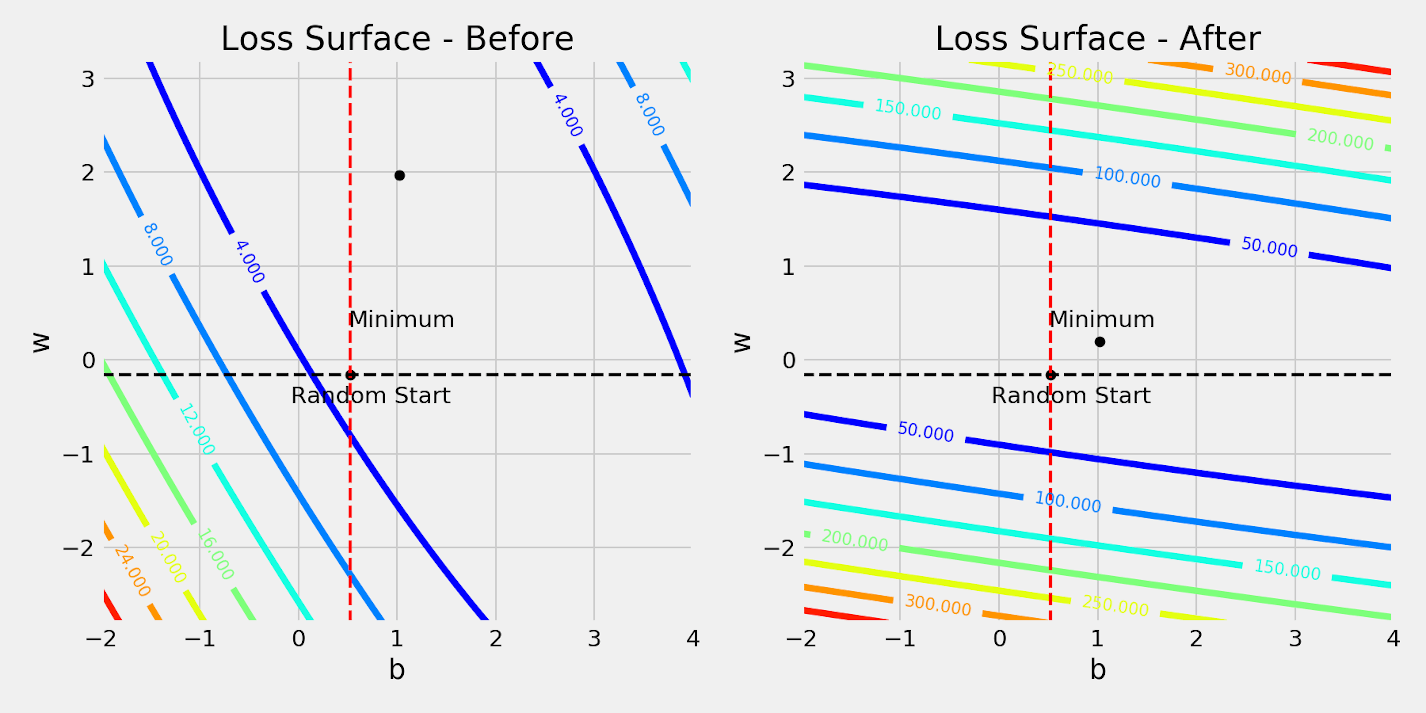

<div dir="rtl">
برای مقادیر یکسان پارامترها ، دارای مقدار loss بیشتر هستیم. مثلا قبلا خط آبی مقدار 3.0 را نشان می‌داد و الآن مقدار 50.0 را!

اگر به نمودار زیر دقت شود، منحنی قرمز شیبدارتر شده است. به همین دلیل باید learning rate کمتری اتخاذ شود تا به نحو امن به مقدار مینیمال برسد.

یادمان باشد که اندازۀ learning rate براساس شیب منحنی محدود می‌گردد.
</div>

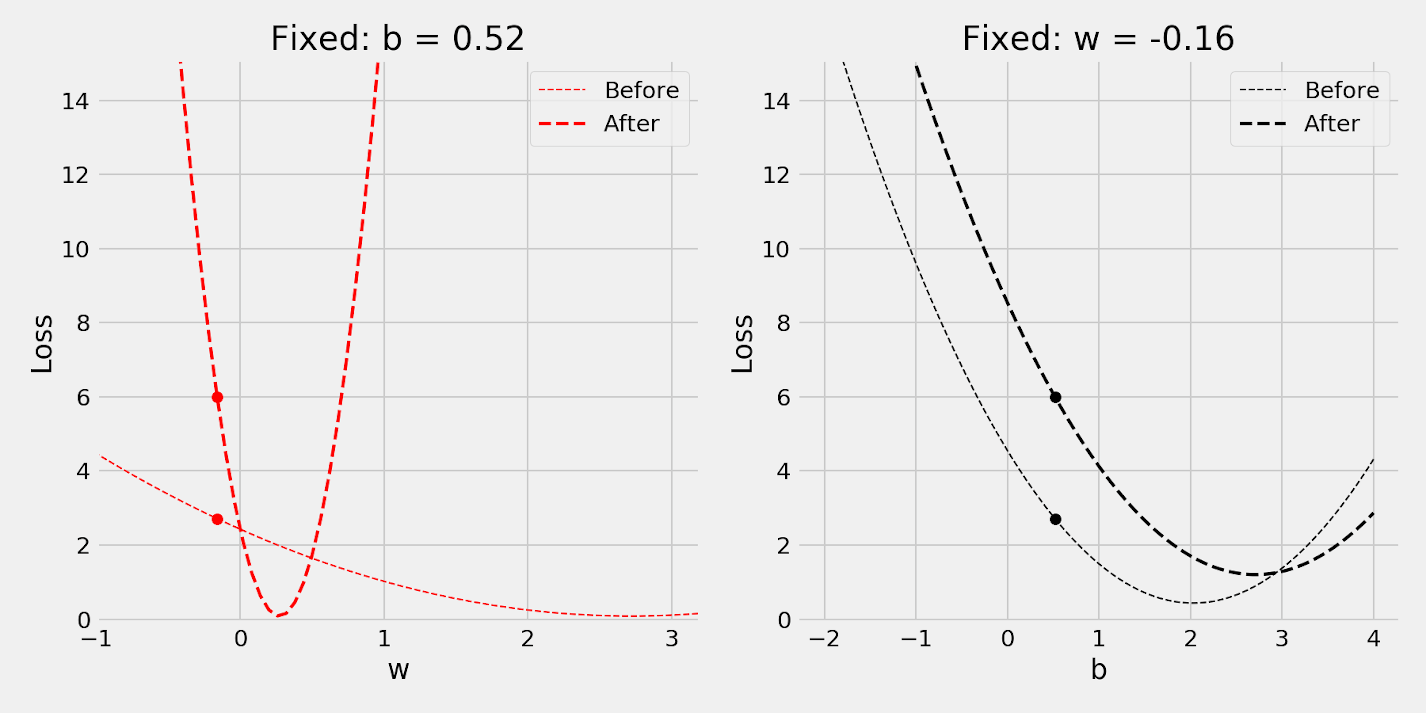

<div dir="rtl">
ما با 10 برابر کردن باعث خراب شدن آن شده‌ایم. اگر بتوانیم به نحوی دیگر آن را scale کنیم، شاید بتوانیم باعث بهبود شویم!
</div>

<div dir="rtl">
<h1>نرمالایز کردن/استاندارد کردن</h1>
چیز زیبایی که اینجا وجود دارد، StandardScaler است که یک ویژگی را با حالتی می‌برد که دارای ویژگی صفر و مقدار std واحد باشد. به این صورت که میانگین و std آن ویژگی را بدست می‌آورد و با کم کردن میانگین ویژگی از آن و تقسیم بر مقدار std، باعث استاندارد شدن آن می‌گردد.

<b>نکتۀ مهمی که وجود دارد آن است که قدم‌ههای pre-processing مانند StandardScaler باید پس از تقسیم train-validation-test صورت بگیرد. در غیر اینصورت باعث نشت اطلاعات از مجموعۀ validation و test در مدل خود می‌شویم.

پس از آن که تنها از مجموعۀ training برای فیت کردن StandardScaler استفاده کردیم، باید از transform() برای اعمال قدم‌های pre-processing بر روی کل دیتاست کنیم. چه training، validation و test</b>
</div>

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, with_std=True)
# We use the TRAIN set ONLY to fit the scaler
scaler.fit(x_train)
# Now we can use the already fit scaler to TRANSFORM
# both TRAIN and VALIDATION sets
scaled_x_train = scaler.transform(x_train)
scaled_x_val = scaler.transform(x_val)

<div dir="rtl">
با استفاده از کد بالا می‌توان به مقدار نرمالایز شدۀ داده‌ها رسید. حالا loss surface را ترسیم می‌کنیم.
</div>

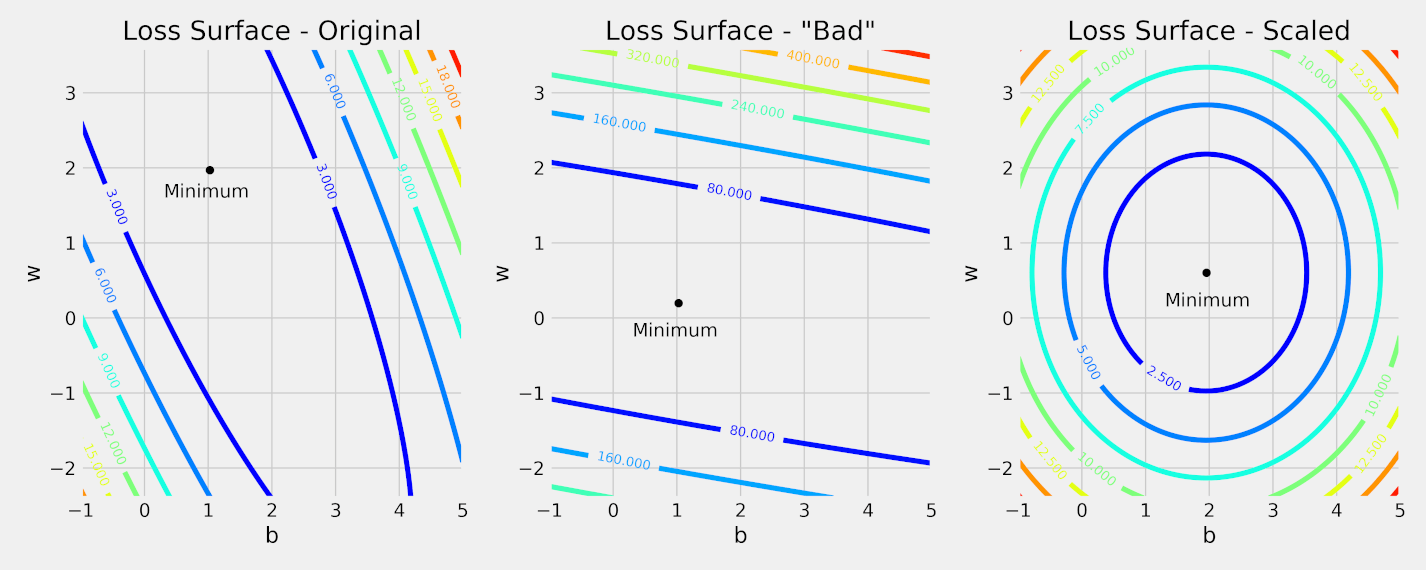

<div dir="rtl">
مشاهده می‌گردد که loss surface در بهترین شکل خود است. عملا cross-sections شبیه هم شیبدار هستند. همچنین یک learning rate خوب برای یکی از آن‌ها، برای بقیه هم خوب است :)</div>

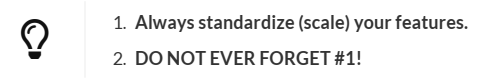

<div dir="rtl">
<h1>مسیر گرادیان کاهشی</h1>
گرادیان کاهشی چه مسیری را از مقادیر تصادفی اولیه تا مقادیر مینیمم طی می‌کند؟ چقدر طول می‌کشد؟ آیا به مقدار مینیمم می‌رسد؟

این‌ها سوالاتی در باب مسیر گرادیان کاهشی است.
</div>

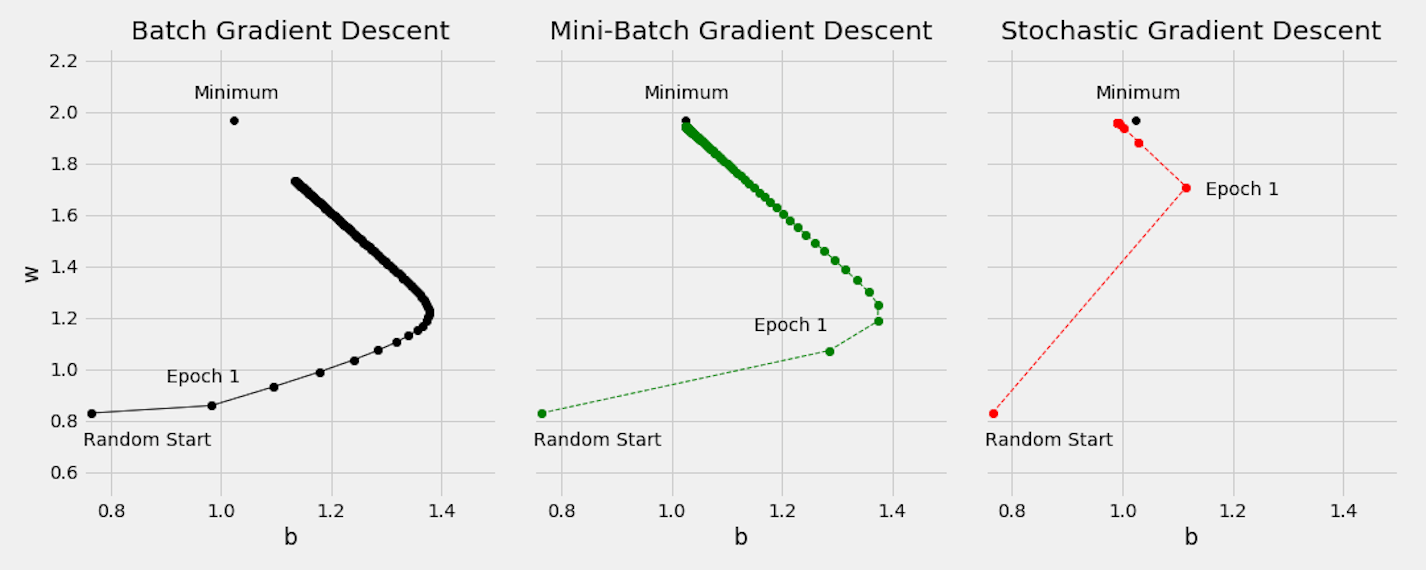

Clearly, there is a **trade-off** here: Either we have a **stable** and **smooth** trajectory, or we move **faster toward the minimum**.